In [4]:
# # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=5)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=5)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 5


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code


In [26]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city_data=[]
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city

#city_data:[]

#city_lat=[]
#city_lng = []
#city_max_temp = []
#city_humidity = []
#city_clouds = []
#city_wind = []
#city_country = []
#city_date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = query_url + city
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
       # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})     
     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
print(city_data)

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=punta arenas
Processing Record 1 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=tilichiki
Processing Record 2 of Set 1 | tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=pingliang
Processing Record 3 of Set 1 | pingliang
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=mar del plata
Processing Record 4 of Set 1 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=f3facaf43659a250aaed9bdcc2e6dd0c&units=metric&q=torbay
Processing Record 5 of Set 1 | torbay
[{'City': 'punta arenas', 'Lat': -53.15, 'Lng': -70.9167, 'Max Temp': 1.06, 'Humidity': 86, 'Cloudiness': 0, 'Wind Speed': 0, 'Country': 'CL', 'Date': 1678001129}, {'City':

In [38]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df=pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          5
Lat           5
Lng           5
Max Temp      5
Humidity      5
Cloudiness    5
Wind Speed    5
Country       5
Date          5
dtype: int64

In [39]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,1.06,86,0,0.00,CL,1678001129
1,tilichiki,60.4667,166.1000,-31.33,95,12,2.19,RU,1678001162
2,pingliang,35.5392,106.6861,17.20,17,3,3.77,CN,1678000866
3,mar del plata,-38.0023,-57.5575,19.49,89,40,1.54,AR,1678001163
4,torbay,47.6666,-52.7314,-9.91,82,20,5.66,CA,1678001163


In [40]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [41]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,1.06,86,0,0.00,CL,1678001129
1,tilichiki,60.4667,166.1000,-31.33,95,12,2.19,RU,1678001162
2,pingliang,35.5392,106.6861,17.20,17,3,3.77,CN,1678000866
3,mar del plata,-38.0023,-57.5575,19.49,89,40,1.54,AR,1678001163
4,torbay,47.6666,-52.7314,-9.91,82,20,5.66,CA,1678001163


## Create the Scatter Plots Requested

### Latitude Vs. Temperature

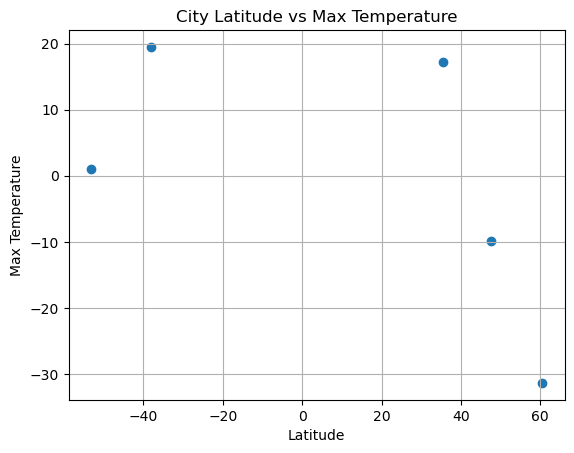

In [47]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.title(f"City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

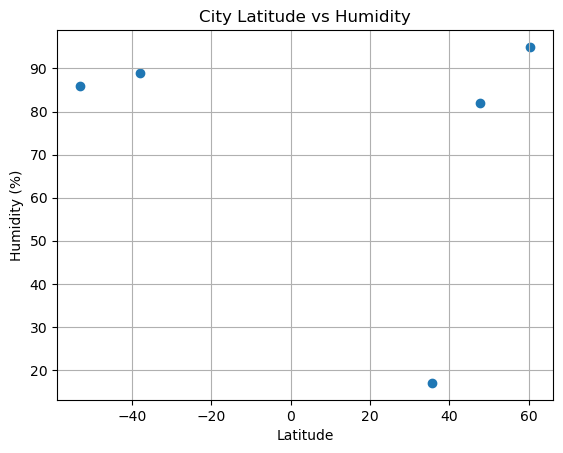

In [48]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

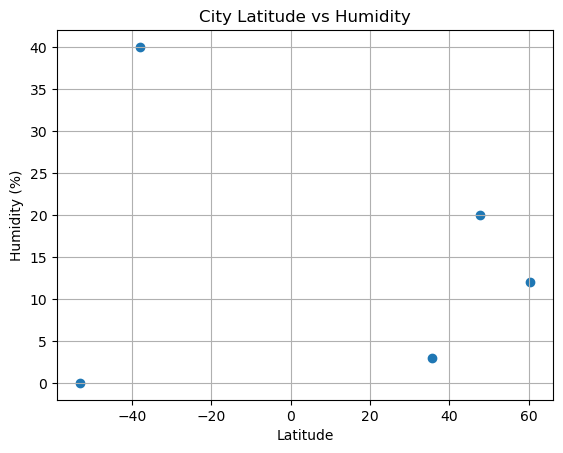

In [49]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

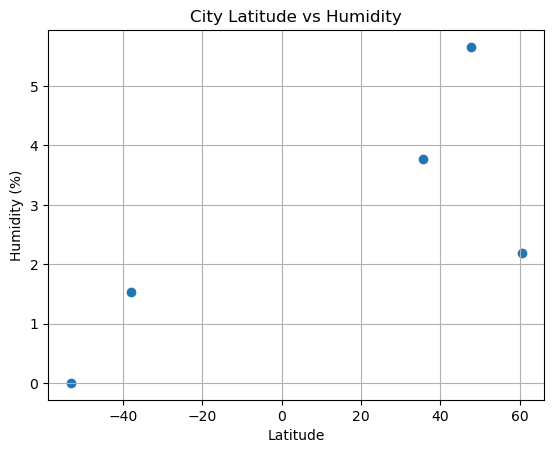

In [50]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

NameError: name 'stats' is not defined

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tilichiki,60.4667,166.1000,-31.33,95,12,2.19,RU,1678001162
2,pingliang,35.5392,106.6861,17.20,17,3,3.77,CN,1678000866
4,torbay,47.6666,-52.7314,-9.91,82,20,5.66,CA,1678001163


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,1.06,86,0,0.00,CL,1678001129
3,mar del plata,-38.0023,-57.5575,19.49,89,40,1.54,AR,1678001163


###  Temperature vs. Latitude Linear Regression Plot


In [54]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Northern Hemi")

NameError: name 'plot_linear_regression' is not defined